# Addition of two numbers using ML

In [1]:
import pandas as pd

In [3]:
 data = pd.read_csv('add.csv')

In [4]:
data

,x,y,sum
0,1.0,1.0,2.0
1,2.0,2.0,4.0
2,4.0,4.0,8.0
3,6.0,6.0,12.0
4,7.0,7.0,14.0
5,10.0,10.0,20.0
6,14.0,14.0,28.0
7,21.0,21.0,42.0
8,24.0,24.0,48.0
9,25.3,27.7,53.0


In [5]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,2.0,2.0,4.0
2,4.0,4.0,8.0
3,6.0,6.0,12.0
4,7.0,7.0,14.0


In [6]:
data.tail()

,x,y,sum
14,97.4,17.3,114.7
15,65.0,49.0,114.0
16,300.0,200.0,500.0
17,216.0,118.0,334.0
18,287.0,312.0,599.0


In [7]:
data.shape

(19, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       19 non-null     float64
 1   y       19 non-null     float64
 2   sum     19 non-null     float64
dtypes: float64(3)
memory usage: 584.0 bytes


In [10]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


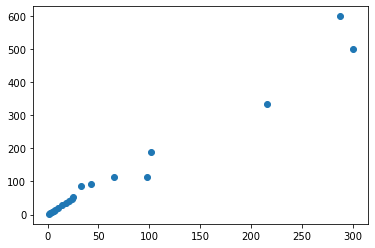

In [11]:
plt.scatter(data['x'],data['sum'])

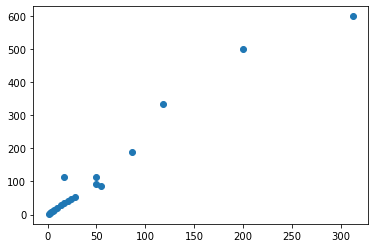

In [12]:
plt.scatter(data['y'],data['sum'])

# Feature Matrix , Response Vector

In [15]:
X=data[['x','y']]
y=data['sum']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [19]:
X_train

,x,y
13,102.0,86.0
15,65.0,49.0
17,216.0,118.0
2,4.0,4.0
9,25.3,27.7
18,287.0,312.0
4,7.0,7.0
12,43.0,49.0
7,21.0,21.0
10,18.3,16.4


# Importing the Model

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [23]:
model.score(X_train,y_train)

1.0

In [24]:
model.score(X_test,y_test)

1.0

In [25]:
y_pred=model.predict(X_test)

In [26]:
y_pred

array([  2. ,  20. ,  87.7,   4. ,  48. , 500. ,  12. ])

In [27]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
0,2.0,2.0
5,20.0,20.0
11,87.7,87.7
1,4.0,4.0
8,48.0,48.0
16,500.0,500.0
3,12.0,12.0


In [28]:
model.predict([[27,112]])

C:\Users\GIHAN SACHITH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139.])

In [29]:
model.predict([[127,222]])

C:\Users\GIHAN SACHITH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([349.])

# Save the File

In [30]:
import joblib
joblib.dump(model,'model_joblib')
model=joblib.load('model_joblib')

In [31]:
model.predict([[27,112]])

C:\Users\GIHAN SACHITH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139.])

In [32]:
X=data[['x','y']]
y=data['sum']
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [33]:
import joblib
joblib.dump(model,'model_joblib')
model=joblib.load('model_joblib')

In [34]:
model.predict([[27,112]])

C:\Users\GIHAN SACHITH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139.])

# Creating Interface

In [ ]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    model=joblib.load('model_joblib')
    result=model.predict([[p1,p2]])
    Label(master,text='sum is = ').grid(row=4)
    Label(master,text=result).grid(row=5)
    print("sum is",result)
    
    
    
    
    
from tkinter import *
import joblib
    
master=Tk()
master.title("Addition of two numbers using ML")
label= Label(master, text="addition of two numbers using ML",bg='black',fg='white').grid(row=0,columnspan=2)

Label(master,text="Enter First Number").grid(row=1)
Label(master,text="Enter Second Number").grid(row=2)
e1=Entry(master)
e2=Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
Button(master,text='predict',command=show_entry_fields).grid()
mainloop()